# KNN工作原理
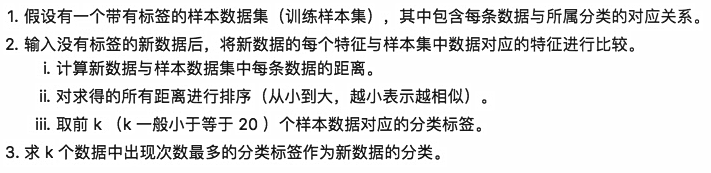

# KNN一般流程
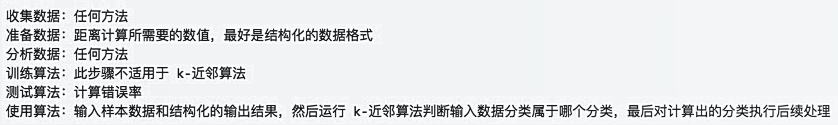

# KNN算法特点
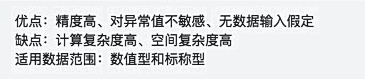

# 约会网站knn

In [1]:
from numpy import *
import operator
from os import listdir

In [2]:
#准备数据
def file2matrix(filename):
    #导入训练数据
    fr = open(filename)
    #获取行数目
    numberOfLines = len(fr.readlines())
    #生成空矩阵
    returnMat = zeros((numberOfLines, 3))
    #prepare labels[]
    classLabelVector = []
    
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        #line.strip([chars]) --移除头尾空格之类的东西
        line = line.strip()
        #'\t'切割
        listFromLine = line.split('\t')
        #将列属性数据
        returnMat[index, :] =  listFromLine[0:3]
        #label
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    
    #return MAT &  Lable
    return returnMat, classLabelVector

In [3]:
#分析数据
import matplotlib
import matplotlib.pyplot as plt
def data2figure(datingDataMat,datingLabels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
    plt.show()

In [4]:
#归一化
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    normDataSet = (dataSet - minVals) / ranges
    
    return normDataSet, ranges, minVals

In [5]:
#knn测试算法
def classify0(inX, dataSet, labels, k):
    """
    inX: 用于分类的输入向量
    dataSet: 输入的训练样本集
    labels: 标签向量
    k: 选择最近邻居的数目
    """
    #求欧氏距离，sizenum = shape[0]
    dataSetSize = dataSet.shape[0]
    #tile inx,(a,b) 将inx复制为a行，每行为b次数据重复；这么做是为了将inx与dataset做欧氏距离
    """
    这里用tile扩展inx - dataset矩阵作出了差矩阵
    """
    diffMat = tile(inX,(dataSetSize, 1)) - dataSet
    #平方
    sqDiffMat = diffMat ** 2
    #平方和,axis=1 表示一行中所有元素相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方
    distances = sqDistances ** 0.5
    #排序并输出索引
    """
    这里将差值矩阵排序，返回索引位置sortedDistIndicies
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])
    """
    sortedDistIndicies = distances.argsort()
    
    #选择k点
    """
    这里采用字典的方法，将已有的降序矩阵提出前k个的类别，统计类别个数。
    """
    classCount = {}
    #类别个数统计循环
    for i in range(k):
        #votelabel=label[0-3] 先获取类别
        voteIlabel = labels[sortedDistIndicies[i]]
        #get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        #在字典中将该类别+1，classCount[voteIlabel] = if get success，then classcount{vote: 0+1}
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        print classCount
    #排序返回 itemgetter(1)是说先按0,1,2,3...中的第1个元素来比较 reverse true降序
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
            

In [6]:
def datingClassTest():
    hoRatio = 0.1
    #加载数据
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #shape函数是numpy.core.fromnumeric中的函数，它的功能是查看矩阵或者数组的维数
    #测试样本数量
    m = normMat.shape[0]
    #开始numvec ，结束 numvec+m
    numTestVecs = int(m * hoRatio)
    print 'numTestVecs', numTestVecs
    
    data2figure(datingDataMat,datingLabels)
    
    errorCount = 0.0
    for i in range(numTestVecs):
        #inputneedtestp[0-numtestvecs]，训练样本[numtestvecs-last]，label，k
        classifierResult = classify0(normMat[i, :],normMat[numTestVecs:m, :],datingLabels[numTestVecs:m],3)
        print 'the classifier came back with: %d, the real answer is: %d'%(classifierResult,datingLabels[i])
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print "the total error rate is: %f" % (errorCount / float(numTestVecs))
    print errorCount

In [28]:
#预测函数
def clasdifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(raw_input("percentage of time spent playing video games ?"))
    ffMiles = float(raw_input("frequent filer miles earned per year?"))
    iceCream = float(raw_input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels, 3)
    print "You will probably like this person: ", resultList[classifierResult - 1]

In [27]:
if __name__ == '__main__':
    #约会网站
    #datingClassTest()
    #clasdifyPerson()
    
    #手写数字
    handwritingClassTest()

{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0
{0: 1}
{0: 2}
{0: 3}
the classifier came back with: 0, the real answer is: 0

{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 1}
{1: 2}
{1: 3}
the classifier came back with: 1, the real answer is: 1

{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2
{2: 1}
{2: 2}
{2: 3}
the classifier came back with: 2, the real answer is: 2

{3: 1}
{3: 1, 5: 1}
{9: 1, 3: 1, 5: 1}
the classifier came back with: 9, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 1}
{3: 2}
{3: 3}
the classifier came back with: 3, the

{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4
{4: 1}
{4: 2}
{4: 3}
the classifier came back with: 4, the real answer is: 4

{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 1, 6: 1}
{5: 2, 6: 1}
the classifier came back with: 5, the real answer is: 5
{5: 1}
{5: 2}
{5: 3}
the classifier came back with: 5, the real 

{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 6

{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{7: 1}
{7: 2}
{7: 3}
the classifier came back with: 7, the real answer is: 7
{8: 1}
{8: 2}
{8: 3}
the classifier came back with: 8, the real answer is: 8
{8: 1}
{8: 2}
{8: 3}
the classifier came back with: 8, the real answer is: 8
{8: 1}
{8: 2}
{8: 3}
the classifier came back with: 8, the real answer is: 8
{6: 1}
{6: 2}
{6: 3}
the classifier came back with: 6, the real answer is: 8
{8: 1}
{8: 2}
{8: 3}
the classifier came back with: 8, the real answer is: 8
{8: 1}
{8: 2}
{8: 3}
the classifier came back with: 8, the real answer is: 8

{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9
{9: 1}
{9: 2}
{9: 3}
the classifier came back with: 9, the real answer is: 9

# 手写数字识别

In [29]:
def img2vector(filename):
    """
    将txt文件中矩阵图像数据转化为向量：
    创建 1 * 1024 的NumPy数组，然后打开给定的文件；
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组
    """
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [22]:
def handwritingClassTest():
    hwLabels = []
    #load the training set dir
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    #m*1024的空vector
    trainingMat = zeros((m,1024))
    #读取文件填充trainingmat
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        #label
        hwLabels.append(classNumStr)
        #调用img2vector读取处理名为%filenamestr的文件,最后得到trainingMat,其每行都是特征向量
        trainingMat[i,:] = img2vector('trainingDigits/%s' %fileNameStr)
        
    #load the test set dir
    testFileList = listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        #vectorUnderTest,此后将test vector[i]行特征向量做knn
        vectorUnderTest = img2vector('testDigits/%s' %fileNameStr)
        #do knn
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
            
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount / float(mTest))